In [5]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Load CSV Files 
mouse_drug_data = "mouse_drug_data.csv"
clinical_trial_data = "clinicaltrial_data.csv"

# Read CSV Files
mouse_drug = pd.read_csv(mouse_drug_data)
clinical_trial = pd.read_csv(clinical_trial_data)

# Merge Data in CSV Files
data_sets = pd.merge(clinical_trial, mouse_drug, on="Mouse ID", how="outer")

# Display the data table for preview
data_sets.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume = data_sets.groupby(['Drug','Timepoint']).mean()
tumor_volume_mean = tumor_volume['Tumor Volume (mm3)']

# Convert to DataFrame and Preview
tumor_volume_mean_df = pd.DataFrame(tumor_volume_mean)
tumor_volume_mean_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_standard_error = data_sets.groupby(['Drug', 'Timepoint']).sem()
tumor_volume_sem = tumor_volume_standard_error['Tumor Volume (mm3)']

# Convert to DataFrame and Preview
tumor_volume_sem_df = pd.DataFrame(tumor_volume_sem)
tumor_volume_sem_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [8]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_pivot_table = tumor_volume_mean_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_volume_pivot_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


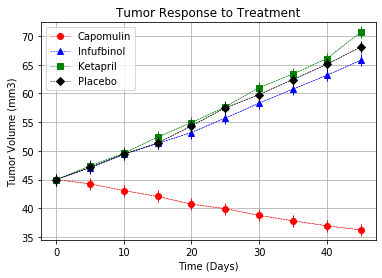

In [30]:
# Generate the Plot (with Error Bars)
Capomulin1, = plt.plot(tumor_volume_pivot_table['Capomulin'], color='red', marker='o', linestyle='dashed', linewidth=0.5,label='Capomulin')
Capomulin2, = plt.plot(tumor_volume_pivot_table['Capomulin'], color='red', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
Infufbinol1, = plt.plot(tumor_volume_pivot_table['Infubinol'], color='blue', marker='^', linestyle='dashed', linewidth=0.5,label='Infufbinol')
Infufbinol2, = plt.plot(tumor_volume_pivot_table['Infubinol'], color='blue', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
Ketapril1, = plt.plot(tumor_volume_pivot_table['Ketapril'], color='green', marker='s', linestyle='dashed', linewidth=0.5,label='Ketapril')
Ketapril2, = plt.plot(tumor_volume_pivot_table['Ketapril'], color='green', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
Placebo1, = plt.plot(tumor_volume_pivot_table['Placebo'], color='black', marker='D', linestyle='dashed', linewidth=0.5,label='Placebo')
Placebo2, = plt.plot(tumor_volume_pivot_table['Placebo'], color='black', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)

# Add Legend
plt.legend()

# Show Grid on plot
plt.grid()

# Add Chart Title
plt.title("Tumor Response to Treatment")

# Add x axis y axis titles
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

#Save picture 
plt.savefig("Tumor_Response_to_Treatment")
plt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Metastatic Sites Data Grouped by Drug and Timepoint 
met_sites = data_sets.groupby(['Drug', 'Timepoint']).mean()
met_sites_mean = met_sites['Metastatic Sites']

# Convert to DataFrame and Preview
met_sites_mean_df = pd.DataFrame(met_sites_mean)
met_sites_mean_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [11]:
# Store the Standard Error associated with Metastatic Sites Data Grouped by Drug and Timepoint 
met_sites_standard_error = data_sets.groupby(['Drug', 'Timepoint']).sem()
met_sites_sem = met_sites_standard_error['Metastatic Sites']

# Convert to DataFrame and Preview
met_sites_sem_df = pd.DataFrame(met_sites_sem)
met_sites_sem_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [12]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_pivot_table = met_sites_mean_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
met_sites_pivot_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


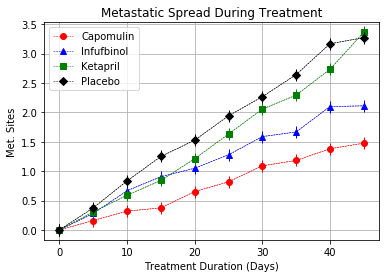

In [32]:
# Generate the Plot (with Error Bars)
Capomulin1, = plt.plot(met_sites_pivot_table['Capomulin'], color='red', marker='o', linestyle='dashed', linewidth=0.5,label='Capomulin')
Capomulin2, = plt.plot(met_sites_pivot_table['Capomulin'], color='red', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
Infubinol1, = plt.plot(met_sites_pivot_table['Infubinol'], color='blue', marker='^', linestyle='dashed', linewidth=0.5,label='Infufbinol')
Infubinol2, = plt.plot(met_sites_pivot_table['Infubinol'], color='blue', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
Ketapril1, = plt.plot(met_sites_pivot_table['Ketapril'], color='green', marker='s', linestyle='dashed', linewidth=0.5,label='Ketapril')
Ketapril2, = plt.plot(met_sites_pivot_table['Ketapril'], color='green', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
Placebo1, = plt.plot(met_sites_pivot_table['Placebo'], color='black', marker='D', linestyle='dashed', linewidth=0.5,label='Placebo')
Placebo1, = plt.plot(met_sites_pivot_table['Placebo'], color='black', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)

# Add Legend
plt.legend()

# Showing the grid on plot
plt.grid()

# Adding title
plt.title("Metastatic Spread During Treatment")

# Adding x and y labels
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

#Save picture 
plt.savefig("Metastatic_Spread")
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint 
mice = data_sets.groupby(['Drug', 'Timepoint']).count()
mice_count = mice['Mouse ID']

# Convert to DataFrame and Preview
mice_count_df = pd.DataFrame(mice_count)
mice_count_df

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [16]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot_table = mice_count_df.pivot_table(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview that Reformatting worked
mice_count_pivot_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


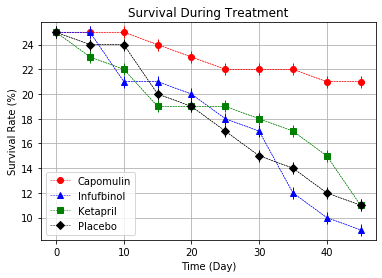

In [33]:
# Generate the Plot (Accounting for percentages) 
Capomulin1, = plt.plot(mice_count_pivot_table['Capomulin'], color='red', marker='o', linestyle='dashed', linewidth=0.5,label='Capomulin')
Capomulin2, = plt.plot(mice_count_pivot_table['Capomulin'], color='red', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
Infufbinol1, = plt.plot(mice_count_pivot_table['Infubinol'], color='blue', marker='^', linestyle='dashed', linewidth=0.5,label='Infufbinol')
Infufbinol2, = plt.plot(mice_count_pivot_table['Infubinol'], color='blue', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
Ketapril1, = plt.plot(mice_count_pivot_table['Ketapril'], color='green', marker='s', linestyle='dashed', linewidth=0.5,label='Ketapril')
Ketapril2, = plt.plot(mice_count_pivot_table['Ketapril'], color='green', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
Placebo1, = plt.plot(mice_count_pivot_table['Placebo'], color='black', marker='D', linestyle='dashed', linewidth=0.5,label='Placebo')
Placebo2, = plt.plot(mice_count_pivot_table['Placebo'], color='black', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)

# Add Legend
plt.legend(handles=[Capomulin1, Capomulin2, Infufbinol1, Infufbinol2, Ketapril1, Ketapril2, Placebo1, Placebo2], loc="lower left")
#plt.legend

# Showing the grid on plot\
plt.grid()

# Adding title
plt.title("Survival During Treatment")

# Adding x and y labels
plt.xlabel("Time (Day)")
plt.ylabel("Survival Rate (%)")

#Save picture 
plt.savefig("Survival")
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
capomulin_change = tumor_volume_pivot_table.Capomulin[45] / tumor_volume_pivot_table.Capomulin[0] - 1
infubinol_change = tumor_volume_pivot_table.Infubinol[45] / tumor_volume_pivot_table.Infubinol[0] - 1
ketapril_change = tumor_volume_pivot_table.Ketapril[45] / tumor_volume_pivot_table.Ketapril[0] - 1
placebo_change = tumor_volume_pivot_table.Placebo[45] / tumor_volume_pivot_table.Placebo[0] - 1

# Display the data to confirm
total_perc_changes = pd.DataFrame({"Drugs": ["Capomulin", "Infubinol", "Ketapril", "Placebo"], "Percent Changes": [capomulin_change, infubinol_change, ketapril_change, placebo_change]})
total_perc_changes

,Drugs,Percent Changes
0,Capomulin,-0.194753
1,Infubinol,0.461235
2,Ketapril,0.570288
3,Placebo,0.512980


In [19]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure
# Show the Figure
#drugs_pivot_table = total_perc_changes.pivot_table(index='Drugs', columns='Drugs', values='Percent Changes')
#drugs_pivot_table

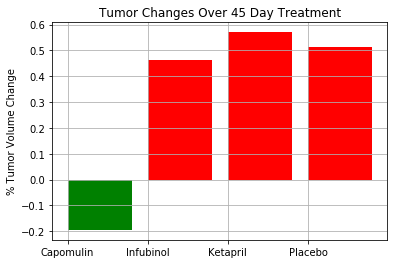

In [38]:
# Splice the data between passing and failing drugs
drugs_pivot_table = total_perc_changes.pivot_table(index='Drugs', columns='Drugs', values='Percent Changes')
drugs_pivot_table

x_axis = np.arange(len(drugs_pivot_table))

plt.bar(x_axis, drugs_pivot_table['Capomulin'], color='green', align="edge")
plt.bar(x_axis, drugs_pivot_table['Infubinol'], color='red', align="edge")
plt.bar(x_axis, drugs_pivot_table['Ketapril'], color='red', align="edge")
plt.bar(x_axis, drugs_pivot_table['Placebo'], color='red', align="edge")

# Orient widths. Add labels, tick marks, etc. 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.title("Tumor Changes Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid()

plt.savefig("Summary Bar Graph")

## Observations About the Results of the Study

1. The tumor metastic spread the least with the Capomulin drug. 
2. The Capomulin drug has the highest survival rate during treatment.
3. The Capomulin drug saw the highest decrease in tumor changes over a 45 day period.